In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot3d_parametric_surface
import sympy as sp
import numpy as np

from IPython.display import Math
from IPython.display import Markdown, display

In [28]:
init_printing(use_unicode=True)
u, v, t = symbols('u v t')

def printmd(string):
    display(Markdown(string))
    
def printmh(string):
    display(Markdown("$" + string + "$"))

def vectorialProduct(v1, v2):
    v1x, v1y, v1z = v1
    v2x, v2y, v2z = v2
    
    wx = v1y * v2z - v1z * v2y
    wy = v1z * v2x - v1x * v2z
    wz = v1x * v2y - v1y * v2x

    norm = sqrt(wx ** 2 + wy ** 2 + wz ** 2)
    wx = simplify(wx / norm)
    wy = simplify(wy / norm)
    wz = simplify(wz / norm)
    
    return wx, wy, wz

def scalarProduct(v1, v2):
    v1x, v1y, v1z = v1
    v2x, v2y, v2z = v2
    
    w = simplify(v1x * v2x + v1y * v2y + v1z * v2z)
    return w

In [29]:
def cylinder():
    return cos(u), sin(u), v, -5, 5, -5, 5

def helicoid(a = 2):
    return v * cos(u), v * sin(u), a * u, -5, 5, -5, 5

def torus(R = 2, r = 1):
    return (R + r * cos(u)) * cos(v), (R + r * cos(u)) * sin(v), r * sin(u), 0, 2*pi, 0, 2*pi

def mobiusStrip(r =  1):
    return (r + u * cos(v)) * cos(2 * v), (r + u * cos(v)) * sin(2 * v), u * sin(v), -0.5, 0.5, 0, pi

def sphere(R = 1):
    return R * cos(u) * cos(v), R * sin(u) * cos(v), R * sin(v), -pi, pi, -pi/2, pi/2

def pseudosphere():
    return cos(v) * (u - tanh(u)), sin(v) * (u - tanh(u)), 1 / cosh(u), 0, 10, 0, 2 * pi

def saddle():
    return u, v, u * v, -10, 10, -10, 10

def revolutionSurface(g, h, umin=-5, umax=5, vmin=-5, vmax=5):
    return g * cos(v), g * sin(v), h, umin, umax, vmin, vmax

def ruledSurface(alpha, beta, umin=-5, umax=5, vmin=-5, vmax=5):
    alpha_x, alpha_y, alpha_z = alpha
    beta_x, beta_y, beta_z = beta
    
    return alpha_x + v * beta_x, alpha_y + v * beta_y, alpha_z + v * beta_z

def catenoid(a = 1, umin=-1, umax=1):
    return a * cosh(u) * cos(v), a * cosh(u) * sin(v), a * u, umin, umax, 0, 2 * pi

def zeroPlane():
    return plane((1,0,0), (0,1,0))
    
def plane(v1, v2, umin=-5, umax=5, vmin=-5, vmax=5):
    v1x, v1y, v1z = v1
    v2x, v2y, v2z = v2
    
    return u * v1x + v * v2x, u * v1y + v * v2y, u * v1z + v * v2z, umin, umax, vmin, vmax

In [30]:
def tangentPlane(fu, fv, u0, v0, umin=-5, umax=5, vmin=-5, vmax=5):
    fu0x = fu[0].evalf(subs={u: u0, v: v0})
    fu0y = fu[1].evalf(subs={u: u0, v: v0})
    fu0z = fu[2].evalf(subs={u: u0, v: v0})
    
    fv0x = fv[0].evalf(subs={u: u0, v: v0})
    fv0y = fv[1].evalf(subs={u: u0, v: v0})
    fv0z = fv[2].evalf(subs={u: u0, v: v0})
    
    fu0 = fu0x, fu0y, fu0z
    fv0 = fv0x, fv0y, fv0z
    
    return plane(fu0, fv0)

def plotTangentPlane(fu, fv, u0, v0, umin=-5, umax=5, vmin=-5, vmax=5):
    fx, fy, fz, umin, umax, vmin, vmax = tangentPlane(fu, fv, u0, v0, umin, umax, vmin, vmax)
    
    p = plot3d_parametric_surface(fx, fy, fz, (u, umin, umax), (v, vmin, vmax))

In [31]:
fx, fy, fz, u_min, u_max, v_min, v_max = torus()

#fx = eval(input("x(u, v) ="))
#fy = eval(input("y(u, v) ="))
#fz = eval(input("z(u, v) ="))

#u_min = eval(input("u_min ="))
#u_max = eval(input("u_max ="))
#v_min = eval(input("v_min ="))
#v_max = eval(input("v_max ="))

f = (fx, fy, fz)

In [32]:
fux = simplify(diff(fx, u))
fuy = simplify(diff(fy, u))
fuz = simplify(diff(fz, u))

fvx = simplify(diff(fx, v))
fvy = simplify(diff(fy, v))
fvz = simplify(diff(fz, v))

fuux = diff(fux, u)
fuuy = diff(fuy, u)
fuuz = diff(fuz, u)

fuvx = diff(fux, v)
fuvy = diff(fuy, v)
fuvz = diff(fuz, v)

fvvx = diff(fvx, v)
fvvy = diff(fvy, v)
fvvz = diff(fvz, v)

fu = (fux, fuy, fuz)
fv = (fvx, fvy, fvz)
fuu = (fuux, fuuy, fuuz)
fuv = (fuvx, fuvy, fuvz)
fvv = (fvvx, fvvy, fvvz)

n = vectorialProduct(fu, fv)

E = scalarProduct(fu, fu)
F = scalarProduct(fu, fv)
G = scalarProduct(fv, fv)

Ip = Matrix([[E, F], [F,G]])

P = scalarProduct(fuu, n)
Q = scalarProduct(fuv, n)
R = scalarProduct(fvv, n)

IIp = Matrix([[P, Q], [Q, R]])
Fp = simplify(Ip ** (-1) * IIp)

detIp = simplify(E*G - F**2)
detIIp = simplify(P*R - Q**2)

gaussCurvature = simplify(detIIp / detIp)
meanCurvature = simplify(1 / 2 * simplify(E*R + G*P - 2*F*Q) / detIp)

# detect properties
conforme = (simplify(E - G) == 0 and simplify(F) == 0)
minimal = (simplify(meanCurvature) == 0)

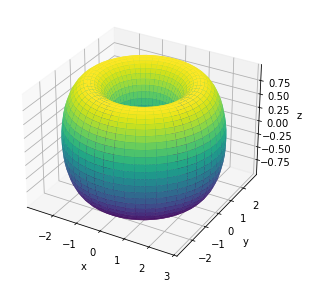

$x(u, v) = \left(\cos{\left(u \right)} + 2\right) \cos{\left(v \right)}$

$y(u, v) =\left(\cos{\left(u \right)} + 2\right) \sin{\left(v \right)}$

$z(u, v) =\sin{\left(u \right)}$

$f_u =\left( - \sin{\left(u \right)} \cos{\left(v \right)}, \  - \sin{\left(u \right)} \sin{\left(v \right)}, \  \cos{\left(u \right)}\right)$

$f_v =\left( - \left(\cos{\left(u \right)} + 2\right) \sin{\left(v \right)}, \  \left(\cos{\left(u \right)} + 2\right) \cos{\left(v \right)}, \  0\right)$

$n =\left( - \frac{\left(\cos{\left(u \right)} + 2\right) \cos{\left(u \right)} \cos{\left(v \right)}}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}}, \  - \frac{\left(\cos{\left(u \right)} + 2\right) \sin{\left(v \right)} \cos{\left(u \right)}}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}}, \  - \frac{\left(\cos{\left(u \right)} + 2\right) \sin{\left(u \right)}}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}}\right)$

First fundamental form:

$E =1$

$F =0$

$G =\left(\cos{\left(u \right)} + 2\right)^{2}$

$I_p =\left[\begin{matrix}1 & 0\\0 & \left(\cos{\left(u \right)} + 2\right)^{2}\end{matrix}\right]$

Second fundamental form:

$P =\frac{\cos{\left(u \right)} + 2}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}}$

$Q =0$

$R =\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}} \cos{\left(u \right)}$

$II_p =\left[\begin{matrix}\frac{\cos{\left(u \right)} + 2}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}} & 0\\0 & \sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}} \cos{\left(u \right)}\end{matrix}\right]$

$F_p =\left[\begin{matrix}\frac{\cos{\left(u \right)} + 2}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}} & 0\\0 & \frac{\cos{\left(u \right)}}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}}\end{matrix}\right]$

Curvature:

Gauss curvature: $K =\frac{\cos{\left(u \right)}}{\cos{\left(u \right)} + 2}$

Mean curvature: $H =\frac{1.0 \left(\cos{\left(u \right)} + 1\right)}{\sqrt{\left(\cos{\left(u \right)} + 2\right)^{2}}}$

In [33]:
p = plot3d_parametric_surface(fx, fy, fz, (u, u_min, u_max), (v, v_min, v_max))
fig = p._backend.fig

printmh("x(u, v) = " + latex(fx))
printmh("y(u, v) =" + latex(fy))
printmh("z(u, v) =" + latex(fz))

printmd("")

printmh("f_u =" + latex(fu))
printmh("f_v =" + latex(fv))

printmd("")

printmh("n =" + latex(n))

printmd("")

printmd("First fundamental form:")
printmh("E =" + latex(E))
printmh("F =" + latex(F))
printmh("G =" + latex(G))
printmh("I_p =" + latex(Ip))

printmd("")

printmd("Second fundamental form:")
printmh("P =" + latex(P))
printmh("Q =" + latex(Q))
printmh("R =" + latex(R))
printmh("II_p =" + latex(IIp))

printmd("")

printmh("F_p =" + latex(Fp))

printmd("")

printmd("Curvature:")
printmd("Gauss curvature: $K =" + latex(gaussCurvature) + "$")
printmd("Mean curvature: $H =" + latex(meanCurvature) + "$")

printmd("")

if conforme:
    printmd("- This parametrization is conform, it preserves the angles")
    
if minimal:
    printmd("- The surface is minimal")

In [37]:
def det(phi1, phi2):
    phi1_x, phi1_y = phi1
    phi2_x, phi2_y = phi2
    
    return simplify(phi1_x * phi2_y - phi2_x * phi1_y)

def scalarProduct2(v1, v2):
    v1x, v1y = v1
    v2x, v2y = v2
    
    w = simplify(v1x * v2x + v1y * v2y)
    return w

In [38]:
phi_x = t
phi_y = log(t)

phi = (phi_x, phi_y)

dphi_x = simplify(Derivative(phi_x, t))
dphi_y = simplify(Derivative(phi_y, t))

dphi = dphi_x, dphi_y

d2phi_x = simplify(Derivative(dphi_x, t))
d2phi_y = simplify(Derivative(dphi_y, t))

d2phi = d2phi_x, d2phi_y

# Curvature

dphiNorm2 = scalarProduct2(dphi, dphi)
curvature = det(dphi, d2phi) / (sqrt((dphiNorm2)**3))

# Osculating circle
denom = simplify(dphi_x * d2phi_y - dphi_y * d2phi_x)
alpha = simplify((dphi_y * dphiNorm2)/denom + phi_x)
beta = simplify((dphi_x * dphiNorm2)/denom + phi_y)
R = simplify(1 / curvature)

#osculating Circle = Eq(part1 ** 2 + part2 ** 2, simplify(R ** 2))

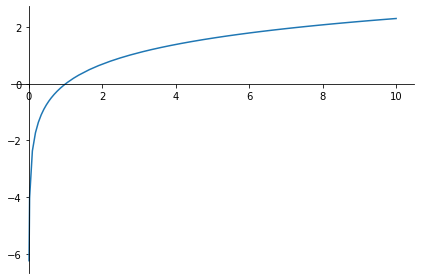

$x(t) = t$

$y(t) = \log{\left(t \right)}$

$x'(t) = 1$

$y'(t) = \frac{1}{t}$

$x''(t) = 0$

$y''(t) = - \frac{1}{t^{2}}$

Curvature:

$\kappa(t) = - \frac{1}{t^{2} \sqrt{\left(1 + \frac{1}{t^{2}}\right)^{3}}}$

Osculating circle:

$(x(t) - (- \frac{1}{t}))^2 + (y(t) - (- t^{2} + \log{\left(t \right)} - 1))^2 = (- t^{2} \sqrt{\frac{\left(t^{2} + 1\right)^{3}}{t^{6}}})^2$

In [39]:
p = plot_parametric(phi_x, phi_y)

printmh("x(t) = " + latex(phi_x))
printmh("y(t) = " + latex(phi_y))

printmh("x'(t) = " + latex(dphi_x))
printmh("y'(t) = " + latex(dphi_y))

printmh("x''(t) = " + latex(d2phi_x))
printmh("y''(t) = " + latex(d2phi_y))

printmd("Curvature:")
printmh("\kappa(t) = " + latex(curvature))

printmd("Osculating circle:")
printmh("(x(t) - (" + latex(alpha) + "))^2 + (y(t) - (" + latex(beta) + "))^2 = (" + latex(R) + ")^2")